# Evolution in Real-time: A Case Study of  Darwin's Finches

### Overview
Peter and Rosemary Grant have observed evolution happen over the short period of time which Darwin though would take hundreds or thousands of years. They study the evolution of Darwin's finches on the Galapagos Islands. The birds have been named for Darwin, in part, because of his indepth study and theory about them. Each species eats a different type of food and has unique characteristics developed through evolution. For example, the cactus finch (G. scandens) has a long beak that reaches into blossoms, the medium ground finch (G.fortis) has a short beak adapted for eating seeds buried under the soil. We are going to analyze changes in the different features of two species of Darwin's finches, namely: G. scandens and G. fortis over the course of 1975 to 2012. We will use the datasets containing the measurements of the beak depth(distance between upper and lower beak when closed) and beak length. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib

## 1.1 Exploratory Data Analysis (EDA) of beak depths of G. Scandens 

In [8]:
# Loading files into dataframes of year 1995 and 2012
finch_1975 = pd.read_csv('data/darwin_finch_beak_1975.csv', sep=',')
finch_2012 = pd.read_csv('data/darwin_finch_beak_2012.csv', sep=',')

# Printing first and last few rows from dataframes
print("------1975--------")
print(finch_1975.head(2))
print(finch_1975.tail(2))

print()
print("------2012--------")
print(finch_2012.head(2))
print(finch_2012.tail(2))

------1975--------
   band species  Beak length, mm  Beak depth, mm
0     2  fortis              9.4             8.0
1     9  fortis              9.2             8.3
      band   species  Beak length, mm  Beak depth, mm
401  20266  scandens            15.05            9.45
402  20279  scandens            13.25            8.35

------2012--------
    band species  blength  bdepth
0  19022  fortis     10.0     8.5
1  19028  fortis     12.5     8.9
      band   species  blength  bdepth
246  21342  scandens     13.1     9.8
247  21347  scandens     15.2     9.1


In [9]:
# Checking for null values
print(finch_1975.info())
print()
print(finch_2012.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             403 non-null    int64  
 1   species          403 non-null    object 
 2   Beak length, mm  403 non-null    float64
 3   Beak depth, mm   403 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   band     248 non-null    int64  
 1   species  248 non-null    object 
 2   blength  248 non-null    float64
 3   bdepth   248 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB
None


**There are no null values in any columns.**

In [10]:
# Preparing boolean mask to select `scandens` species only
is_scandens_1975 = finch_1975['species']== 'scandens'
is_scandens_2012 = finch_2012['species']== 'scandens'

# Selecting rows corresponding to `scandens` species
data_1975 = finch_1975[is_scandens_1975]
data_2012 = finch_2012[is_scandens_2012]


In [11]:
# Change name of columns
data_1975.columns = ['band', 'species', 'beak_length', 'beak_depth']
data_2012.columns = ['band', 'species', 'beak_length', 'beak_depth']

In [12]:
# Subsetting dataframes
df_1975 = data_1975[['beak_length', 'beak_depth']]
df_2012 = data_2012[['beak_length', 'beak_depth']]

In [13]:
# Inserting year column with column values
scandens_1975 = df_1975.assign(year=1975)
scandens_2012 = df_2012.assign(year=2012)

#  Printing first 3 entries in each dataframe
print('G.scandans_1975:')
print(scandens_1975.head(3))
print()
print('G.scandans_2012:')
print(scandens_2012.head(3))

G.scandans_1975:
     beak_length  beak_depth  year
316         13.9         8.4  1975
317         14.0         8.8  1975
318         12.9         8.4  1975

G.scandans_2012:
     beak_length  beak_depth  year
121         14.3         9.4  2012
122         12.5         8.9  2012
123         13.7         9.5  2012


In [14]:
# combining 1975 and 2012 data sets
df = pd.concat([scandens_1975, scandens_2012])

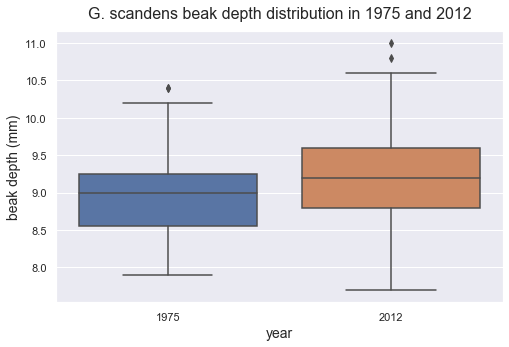

In [15]:
# Beeswarm plot shows distribution of points
sns.set()
plt.figure(figsize=(8,5))
sns.boxplot(x='year', y='beak_depth', data=df)
_ = plt.xlabel('year', fontsize=14)
_ = plt.ylabel('beak depth (mm)', fontsize=14)
_ = plt.title('G. scandens beak depth distribution in 1975 and 2012', pad=12, fontsize=16)

plt.show()

### Discussion:
**The boxplot shows that the distribution of beak depth of G.scandens in 2012 has higher median value and wider distribution than that in 1975.It also probably points that Scandens got deepter beak.**

## 1.2 Empirical Cumulative Distribution Function (ECDF)

In [49]:
# Defining cumulative distribution function: ecdf()
def ecdf(arr):
    '''Computes cumulative empirical porobability of values in the array `arr`.'''
    x = np.sort(arr)
    n = len(arr)
    y = np.arange(1, n + 1) / n
    
    return x, y

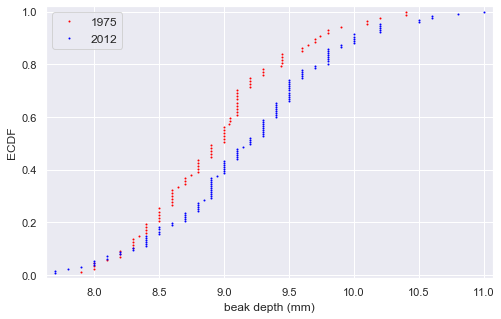

In [50]:
# ECDFs of BEAK DEPTH

# Getting ararys of beak depth for two years
bd_1975 = df_1975['beak_depth'].values
bd_2012 = df_2012['beak_depth'].values

# calculating ecdfs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# plotting ecdfs
plt.figure(figsize=(8,5))
sns.set()
_ = plt.plot(x_1975, y_1975, marker='.',
             markersize=2, linestyle='none', color='red')
_ = plt.plot(x_2012, y_2012, marker='.',
             markersize =2, linestyle='none', color='blue')

# set margins
plt.margins(0.02)

# Axis labels
_ = plt.xlabel('beak depth (mm)', fontsize=12)
_ = plt.ylabel('ECDF', fontsize=12)
_ = plt.legend(('1975', '2012'), loc='upper left', fontsize=12)
plt.show()

### Discussion:
**The differences are pronounced in ECDFs. The blue curve is to the right of red, impling beak depths are larger in 2012 for any fraction of population. Also, it is clearly seen that the blue curve is wider in 2012.**

## 2.1 Mean depth and Confidence Intervals of Beak Depth of G. scandens
We estimate mean beak depth and 95% confidence interval of G. scandens in 1975 and 2012.
Bootstrap sampling technique is used to obtain 10000 replicates of mean parameter using the beak depth data set for 1975 and 2012.

In [53]:
# Define a function to obtain a replicate from a bootstrap sample using 1-d data.
def bootstrap_replicate_1d(data, func):
    '''Obtains a bootstrap sample from `data` and calculates parameter replicate from 
    it using `func`.
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Define a function to draw number of replicates
def draw_bs_reps(data, func, size=1):
    '''Draws bootstrap samples equal to `size` and calculates corresponding replicates.'''
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [54]:
# Calculating difference in mean beak depths and 95% confidence interval
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Obtain mean from 10000 bootstrap samples
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Calculate difference in mean in two years
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Calculte 95% confidence interval for beak depth
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the result
print('Difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int,'mm')


Difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06251373 0.39348142] mm


### Discussion:
**Difference of means = 0.226 mm**

**95% confidence interval of mean = [0.0625  0.3934] mm**

About 0.22 mm change in beak depth in 37 years is substantial by evolutionary standards and it is possible to see such change in one humans life time. Thus, it is logical to say that this evolution is happening in REAL-TIME.

## 2.2 Hypothesis test:
* Are beaks really got deeper in 2012?
* Is it possible that the observed growth (seen in ECDF) of beak depth is just due to random chance? 
* In other words, what is the probability that we woluld get the observed difference in mean beak depth if the means were the same?

We shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference in means to test the hypothesis.

In [55]:
# Observed difference in the mean depth of beaks in from 1975 to 2012
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples to common mean value
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Replicates computed from shifted data sets
bs_replicates_shifted_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_shifted_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Difference in the mean value of replicates of shifted data
bs_diff_shifted_replicates = bs_replicates_shifted_2012 - bs_replicates_shifted_1975

# Compute the p-value
p = np. sum(bs_diff_shifted_replicates >= mean_diff) / len(bs_diff_shifted_replicates)

# Print p-value
print('p =', p)

p = 0.0037


### Discussion:
**p-value = 0.0035 (about 35 instances out of 10k)  is small so the difference is statistically significant. That is the growth observed in the beak depth of G.scandens is not just due to random chance.**

## 3.1 EDA of beak length and beak depth of G. scandens
Change in the length along with the change in the beak depth such that the ratio of length to the depth remains unchanged would keep the beak shape intact. We would see the relationship beak length and depth for G. scandens.

In [56]:
# Get beak lengths and depth in ndarray

bl_1975 = scandens_1975['beak_length'].values
bl_2012 = scandens_2012['beak_length'].values

bd_1975 = scandens_1975['beak_depth'].values
bd_2012 = scandens_2012['beak_depth'].values


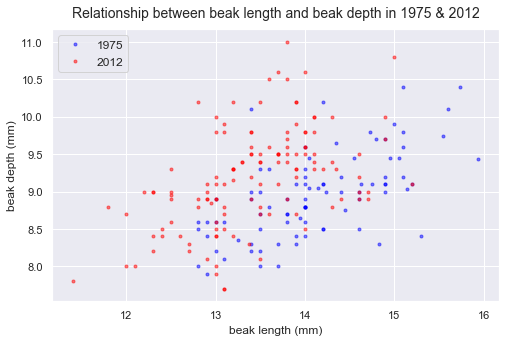

In [57]:
# Scatter plot of beak length and beak depth data of 1975 and 2012

# Set default seaborn style aestehtic
sns.set()

# Set figure size
plt.figure(figsize=(8,5))

# Plot beak length vs beak depth for both years
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)

_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)

# Set axis labels
_ = plt.xlabel('beak length (mm)', fontsize=12)
_ = plt.ylabel('beak depth (mm)', fontsize=12)
_ = plt.legend(('1975', '2012'), loc='upper left', fontsize=12)
_ = plt.title('Relationship between beak length and beak depth in 1975 & 2012', pad=12, fontsize=14)

### Discussion:
**As it seen in scatter plot, for G.scandens, beaks got deeper in 2012 than they were in 1975 but not really longer. Since, red dots are to the left of blue dots, they, rather, got a bit shorter over time. So,  it seems that the shape of beak is changed.**

## 3.2 Linear Regressions

Below, linear regression is permformed between beak length and beak depth data G. scanden for both the 1975 and 2012 data. Pairs bootstrap estimates for the regression parameters: slope and intercept, are obtained along with 95% confidence intervals. 

In [58]:
# Pair bootstrap function:
def draw_bs_pairs_linreg(x, y, size=1):
    '''Perform pairs bootstrap for linear regression'''
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(x))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps [i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    return bs_slope_reps, bs_intercept_reps 

## 3.3 Regression Parameters, Pair bootstrap Sampling and Confidence Intervals

In [59]:
# polyfit() with arg=1 fits st.line
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)

bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)


In [60]:
slope_conf_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

intercept_conf_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_1975)
print()
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_2012)

1975: slope = 0.4652051691605937 conf int = [0.32333892 0.58712666]
1975: intercept = 2.3908752365842267 conf int = [0.71530572 4.36266352]

2012: slope = 0.462630358835313 conf int = [0.34032849 0.6018836 ]
2012: intercept = 2.9772474982360198 conf int = [1.14519236 4.65256405]


**Discussion:** Slopes of the regression lines for 1975 and 2012 are same but intercept for 2012 is larger than 1975, which implies that for given length of beak, the depth is already deeper in 2012.

## 3.4 Visualizing 100 Regression lines fitted to Bootstrap Samples 

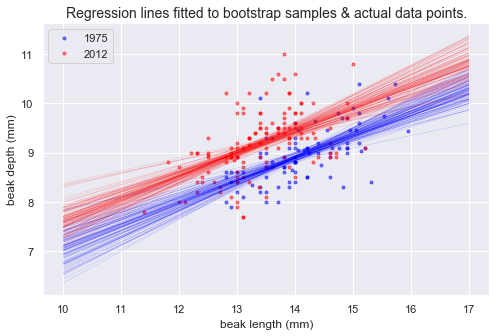

In [61]:
# scatter 1975
plt.figure(figsize=(8,5))
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5, label='1975')

# scatter 2012
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5, label='2012')

# label
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(loc='upper left')
_ = plt.title('Regression lines fitted to bootstrap samples & actual data points.', fontsize=14)

# Generate x-values for bootstrap lines
x = np.array([10, 17])

# plot bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i], linewidth=0.5,
            alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i], linewidth=0.5,
            alpha=0.2, color='red')

### Discusion:
**The blue and red regression lines show the range of variation in slope parameter because of bootstrap sampling in 1975 and 2012. However, 1975 and 2012 lines are well separated vertically implying that the net increase in beak depths in 2012 from 1975.** 

In [62]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean,size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55622831 1.60114918]
2012: mean ratio = 1.4658342276847767 conf int = [1.44416457 1.48726337]


### Discusion:
**The ratio of beak length to beak depth is decreased from 1975 to 2012. This implies that beak has become deeper and increase in beak length couldn't follow up the increase in depth so that G. scandens beak shape is changed.** 

## 4. Heridity
**The dataframe data_scandens contains the average beak depth (in mm) of two parents and average beak depth of the offspring of the respective parents. Also, dataframe df_fortis contains the same information about measurements from G. fortis birds.**

In [63]:
# Read parent offspring beak depth data into dataframes
data_scandens = pd.read_csv('data/scanden_bd_heridity.csv', sep=',')
data_fortis = pd.read_csv('data/fortis_bd_heridity.csv', sep=',')

print(data_scandens.head(3))
print()
print(data_fortis.head(3))

   mid_parent  mid_offspring
0      8.3318         8.4190
1      8.4035         9.2468
2      8.5317         8.1532

   Mid-offspr  Male BD  Female BD
0       10.70     10.9        9.3
1        9.78     10.7        8.4
2        9.48     10.7        8.1


In [64]:
# Calculate average beak depth of G.fortis 
data_fortis['parent_bd'] = data_fortis['Male BD'] / 2 + data_fortis['Female BD'] / 2

# Rename the columns
data_fortis.columns = ['offspring_bd', 'male_bd', 'female_bd', 'parent_bd']
data_scandens.columns = ['parent_bd', 'offspring_bd']

In [65]:
# Subset dataframes
scandens_parent_bd = data_scandens['parent_bd']
scandens_offspring_bd = data_scandens['offspring_bd']
                                    
fortis_parent_bd = data_fortis['parent_bd']

fortis_offspring_bd = data_fortis['offspring_bd']                                


## 4.1 Visualizing the relationship between parents and offspring beak depths

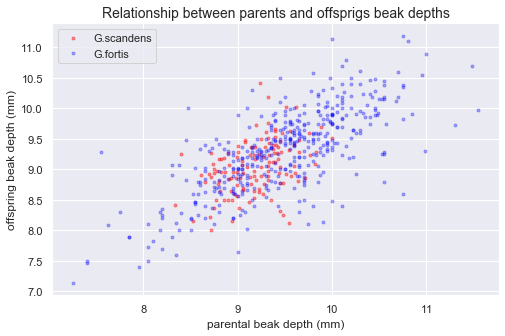

In [66]:
# Create fig and axis objects and set the figure size
fig, ax = plt.subplots(figsize=(8,5))

# Scatter plot the parent and corresponding offspring beak depth data
_ = ax.plot(scandens_parent_bd, scandens_offspring_bd, marker='.',
             color='red', linestyle='none', alpha=0.4, label='G.scandens')

_ = ax.plot(fortis_parent_bd, fortis_offspring_bd, marker='.',
            color='blue', linestyle='none', alpha=0.3, label = 'G.fortis')

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend and tile
ax.legend()
_ = plt.title('Relationship between parents and offsprigs beak depths', fontsize=14)

### Discussions:
**It appears as though there is a stronger correlation in G.fortis than in G.scandens. This suggests that beak depth is more strongly inherited in G.fortis.**

## 4.2 Correlation of offspring and parental data
To quantify that how strong the correlation between offspring and parent beak depths, we compute Pearson correlation coefficient  between parents and offspring. Also, to get confidence intervals on this, we need to do a pairs bootstrap.

In [67]:
# Write a function to select bootstrap pairs from parent and offspring data
def draw_bs_pairs(x, y, func, size=1):
    '''Perform pairs bootstrap for a single statistic evaluated by `func`.'''
    
    # Set up array of indices to sample from: idx
    idx = np.arange(len(x))
    
    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_idx = np.random.choice(idx, len(idx))
        bs_x, bs_y = x[bs_idx], y[bs_idx]
        r, p = func(bs_x, bs_y)
        bs_replicates[i] = r
    return bs_replicates

In [69]:
# Compute the Pearson correlation coefficients
scandens_r = pearsonr(scandens_parent_bd, scandens_offspring_bd )
fortis_r = pearsonr(fortis_parent_bd, fortis_offspring_bd)

bs_replicates_scandens = draw_bs_pairs(scandens_parent_bd, scandens_offspring_bd,
                                       pearsonr, size=1000)
bs_replicates_fortis = draw_bs_pairs(fortis_parent_bd, fortis_offspring_bd,
                                    pearsonr, size=1000)

# Computing 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Printing the results
print('G. scandens:', scandens_r[0], conf_int_scandens)
print('G. fortis:', fortis_r[0], conf_int_fortis)

G. scandens: 0.41170636294012597 [0.26797318 0.54183776]
G. fortis: 0.7283412395518485 [0.66709192 0.77843642]


### Discussion:
**G. scandens:**
correlation coeff (r): 0.411, and
95% confidence interval of r: [0.267 0.541]

**G. fortis:**
correlation coeff (r): 0.728
95% and confidence interval of r: [0.667 0.778]

**It can be inferred from Pearson correlation coefficient confidence intervals that beak depth of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.
This implies that G. fortis has stronger heritability than G. scandens.** 

## 5.1 Variation on Metric of  Heritability
Since, the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. It makes more sense if we define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. Below,the heritability and a pairs bootstrap calculation to is performed to get the 95% confidence interval using this different angle.

In [70]:
def draw_bs_pairs(x, y, func, size=1):
    '''Perform pairs bootstrap for a single statistic.'''
    
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)
    return bs_replicates


def heritability(parents, offspring):
    '''Compute the heritability from parent and offspring samples.'''
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0, 1] / covariance_matrix[0,0]

In [73]:
# Compute the heritability
heritability_scandens = heritability(scandens_parent_bd, scandens_offspring_bd)
heritability_fortis = heritability(fortis_parent_bd, fortis_offspring_bd)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(scandens_parent_bd, scandens_offspring_bd,
                                   heritability, size=1000)
replicates_fortis = draw_bs_pairs(fortis_parent_bd, fortis_offspring_bd,
                                  heritability, size=1000)
# Computing 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.36127137 0.75559405]
G. fortis: 0.7229051911438156 [0.64847721 0.79961223]


### Discussion:
**G. scandens:** heridity  correlation metric: 0.548, and 95% confidence interval: [0.3612 0.755]

**G. fortis:** heridity  correlation metric: 0.723, and 95% and confidence interval: [0.648 0.799]

**The modified correlation metric also shows that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than compared to G. scandens. In addition, it enhances the metric value for Scandens which is establihed by hypothesis testing below.** 

## 5.2 Hypothesis:  Does G. scandens inherit beak depth ?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. TO test this hypothesis, we do pairs permutation test.

In [75]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(scandens_parent_bd)
    perm_replicates[i] = heritability(bd_parent_permuted, scandens_offspring_bd)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


### Discussion:
**We obtained the p-value of zero, which means that none of the 10,000 permutation pairs replicates drawn had a heritability high enough to match the observed value. This strongly suggests that beak depth is heritable in G. scandens, though, not as much as in G. fortis.** 

## 5.3 Visualizing the distribution of inheritance by chance alone.

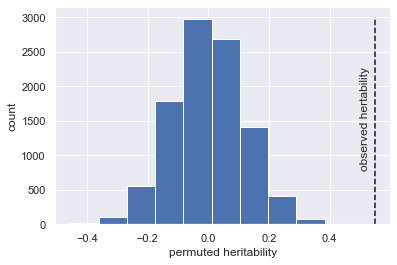

In [76]:
# Histogram of the heriability replicates
_ = plt.hist(perm_replicates)
_ = plt.vlines(heritability_scandens, 0, 3000, linestyle='--')
_ = plt.xlabel('permuted heritability')
_ = plt.ylabel('count')
_ = plt.annotate('observed hertability', (heritability_scandens -0.05, 800), rotation=90)

### Discussion:
**The histogram shows that all of the distribution is far left of observed heritability measure and rarely possible to obtain that value only by chance. Hence, inheritance of beak depth in G. scandens is also real.**

                                            ***The End***